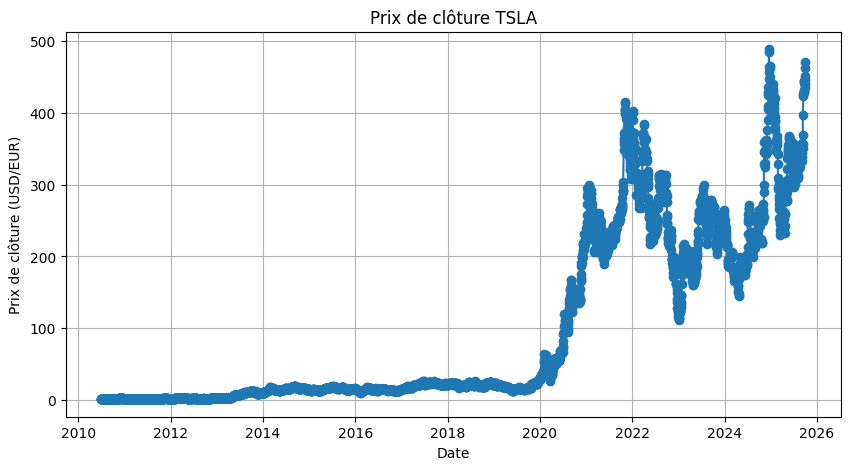

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ticker = 'BTC-EUR'

df = pd.read_csv(f"csv\\{ticker}.csv", skiprows=3, names=['Date','Price','Close','High','Low','Open','Volume'])

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')
plt.title(f"Prix de clôture {ticker}")
plt.xlabel("Date")
plt.ylabel("Prix de clôture (USD/EUR)")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

ticker = 'BTC-EUR'

df = pd.read_csv(
    f"csv\\{ticker}.csv",
    skiprows=3,
    names=['Date','Price','Close','High','Low','Open','Volume']
)
df['Date'] = pd.to_datetime(df['Date'])

df2 = pd.read_csv(f"prevision\\Oudini-{ticker}.csv")
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Close'] = df2['Close'].astype(str).str.replace('[','').str.replace(']','').astype(float)
df2['RMSE'] = df2['RMSE'].astype(str).str.replace('[','').str.replace(']','').astype(float)

colors = px.colors.qualitative.Plotly  
colors_cycle = [colors[i % len(colors)] for i in range(len(df2))]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'], y=df['Close'],
    mode='lines+markers',
    name='Historique',
    line=dict(color='blue'),
    marker=dict(color='blue'),
    hovertemplate='Date: %{x}<br>Close: %{y}<extra></extra>'
))

for i, row in df2.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Date']], y=[row['Close']],
        mode='markers+lines' if i > 0 else 'markers',  
        marker=dict(color=colors_cycle[i], size=10),
        line=dict(color=colors_cycle[i]),
        name=f'Prévision {i+1}',
        error_y=dict(type='data', array=[row['RMSE']], visible=True),
        hovertemplate='Date: %{x}<br>Close: %{y}<br>RMSE: %{error_y.array}<extra></extra>'
    ))

fig.update_layout(
    title=f"Prix de clôture de {ticker} avec prévisions",
    xaxis_title='Date',
    yaxis_title='Prix de clôture (EUR/USD)',
    legend_title_text='Type'
)

fig.show()
